### Import Necessary Libraries

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [ ]:
# For loading dataset and perform operations - Feature Engineering
import pandas as pd
# For numerical computations - Feature Engineering
import numpy as np

# For plotting charts
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset to be used
from sklearn.datasets import load_iris

# For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Load the Dataset

In [14]:
dataset = load_iris(as_frame=True)

In [15]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
target_names = dataset.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
dataset = pd.concat([dataset['data'], dataset['target']], axis=1)


In [20]:
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Quick Inspection of Dataset

In [21]:
dataset.head(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [22]:
# describe() generates statistical summary of numerical columns:
# - count: number of non-null values
# - mean: average value
# - std: standard deviation (measure of spread)
# - min/max: minimum and maximum values
# - 25%, 50%, 75%: quartiles (percentiles showing data distribution)
dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


We can see there are no missing values discrepancy in the data type for the features.

In [ ]:
dataset['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [18]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Split Dataset

In [25]:
X, y = dataset.drop(columns=['target']), dataset['target']

In [26]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [ ]:
# stratify=y ensures that the train/test split maintains the same proportion 
# of each class (iris species) in both sets. This is important for balanced classification.
# For example, if the dataset has 33% of each species, both train and test will have ~33% of each.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [55]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
67,5.8,2.7,4.1,1.0
34,4.9,3.1,1.5,0.2
27,5.2,3.5,1.5,0.2
57,4.9,2.4,3.3,1.0
129,7.2,3.0,5.8,1.6


### Train the Model

In [56]:
# random_state=42: For reproducible results
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)  # .fit() inspects y_train and creates output layer with 3 neurons

/opt/homebrew/Caskroom/miniforge/base/envs/kaggle_workshop/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(10, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,300
,shuffle,True
,random_state,42


### Model Evaluation

In [57]:
# Predict
y_pred = mlp_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [43]:
def predict_flower(sepal_length, sepal_width, petal_length, petal_width):
    test_point = pd.DataFrame([{"sepal length (cm)": sepal_length, "sepal width (cm)": sepal_width, "petal length (cm)": petal_length, "petal width (cm)": petal_width},])
    y_pred = mlp_model.predict(test_point)
    return y_pred

predict_flower(4.4, 3.0, 1.3, 0.2)

array([0])

In [45]:
y_test

38     0
127    2
57     1
93     1
42     0
56     1
22     0
20     0
147    2
84     1
107    2
141    2
104    2
51     1
7      0
49     0
14     0
69     1
63     1
138    2
10     0
140    2
58     1
134    2
132    2
77     1
75     1
18     0
116    2
28     0
Name: target, dtype: int64

In [44]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
38,4.4,3.0,1.3,0.2
127,6.1,3.0,4.9,1.8
57,4.9,2.4,3.3,1.0
93,5.0,2.3,3.3,1.0
42,4.4,3.2,1.3,0.2
56,6.3,3.3,4.7,1.6
22,4.6,3.6,1.0,0.2
20,5.4,3.4,1.7,0.2
147,6.5,3.0,5.2,2.0
84,5.4,3.0,4.5,1.5


In [46]:
y_pred = mlp_model.predict(X_test)

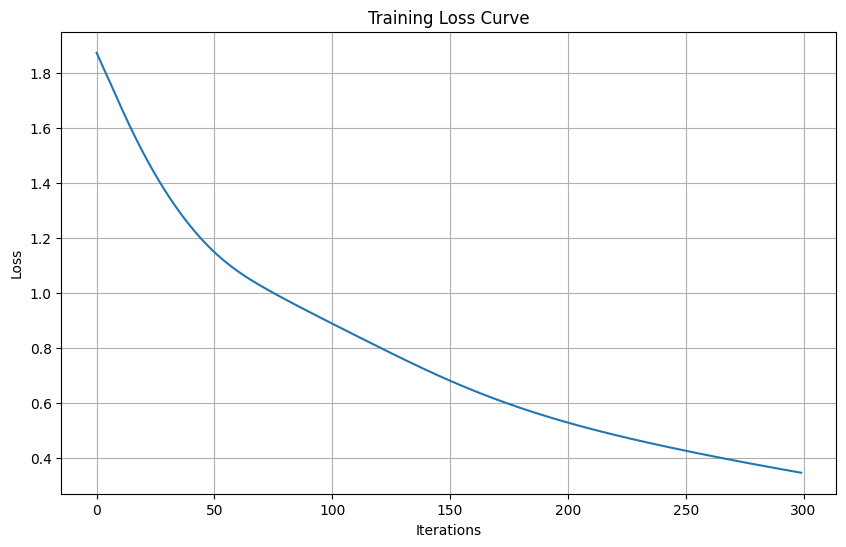

In [59]:
# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(mlp_model.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()

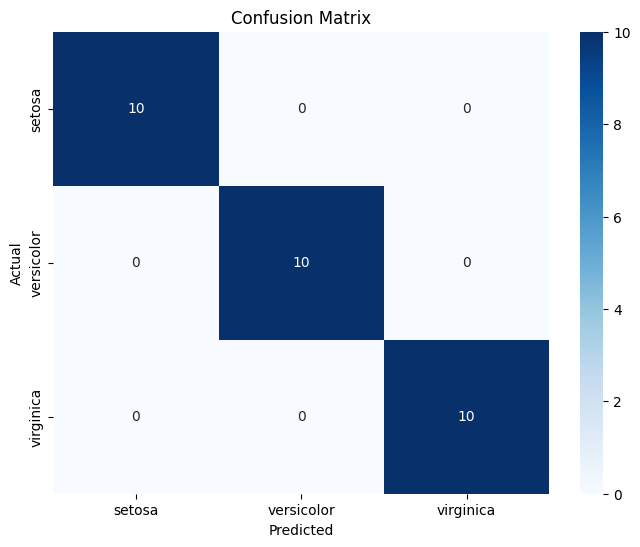

In [60]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['setosa', 'versicolor', 'virginica'], 
            yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Save the Model

In [61]:
import joblib

# Save the entire scikit-learn model (recommended approach for sklearn models)
# joblib is more efficient than pickle for models with large numpy arrays
joblib.dump(mlp_model, 'iris_mlp_model.joblib')
print("Model saved as 'iris_mlp_model.joblib'")

Model saved as 'iris_mlp_model.joblib'


### Load and Run the Model

In [62]:
loaded_model = joblib.load('iris_mlp_model.joblib')
loaded_model.predict(X_test)

array([2, 1, 1, 2, 2, 2, 1, 2, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2,
       0, 1, 2, 1, 1, 0, 0, 0])

In [63]:
# Predict
y_pred = loaded_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
def predict_flower(sepal_length, sepal_width, petal_length, petal_width):
    test_point = pd.DataFrame([{"sepal length (cm)": sepal_length, "sepal width (cm)": sepal_width, "petal length (cm)": petal_length, "petal width (cm)": petal_width},])
    loaded_model = joblib.load('iris_mlp_model.joblib')
    y_pred = loaded_model.predict(test_point)
    return y_pred

predict_flower(6.5, 3.0, 5.8, 2.2)

array([2])

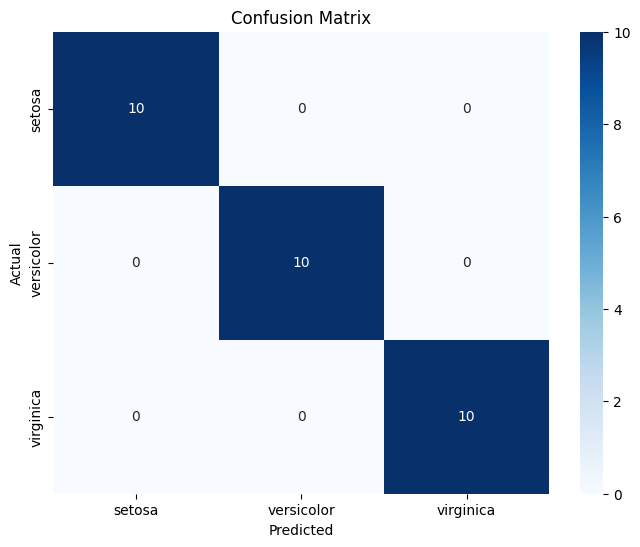

In [65]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['setosa', 'versicolor', 'virginica'], 
            yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()